In [110]:
import pandas as pd
import numpy as np 
from datetime import datetime

In [111]:
injuries = pd.read_csv("Injuries2016_2018.csv" 
                     )
vehicles =pd.read_csv("Vehicles2016_2018.csv")


In [177]:
injuries

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type
0,WC,60558.0,01/01/16 02:23,2,Light
1,WC,60559.0,01/01/16 07:05,4,Severe
2,WC,60560.0,01/01/16 08:43,1,Light
3,WC,60560.0,03/01/16 03:47,5,Light
4,WC,60561.0,03/01/16 08:40,2,Light
...,...,...,...,...,...
16936,WC,87015.0,Dec 31 2018 9:12PM,0,None
16937,WC,87016.0,Dec 31 2018 9:32PM,0,None
16938,WC,87017.0,Dec 31 2018 9:54PM,0,None
16939,WC,87017.0,Dec 31 2018 10:11PM,0,None


In [178]:
vehicles

,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558.0,01/01/16 00:52,Car,White
1,WC,60559.0,01/01/16 00:49,Car,Other
2,WC,60560.0,01/01/16 02:23,Car,Other
3,WC,60560.0,01/01/16 02:23,Car,Other
4,WC,60561.0,01/01/16 02:55,Car,White
...,...,...,...,...,...
63463,WC,152136.0,Dec 31 2018 9:12PM,Car,Other
63464,WC,152139.0,Dec 31 2018 9:32PM,Car,Other
63465,WC,152142.0,Dec 31 2018 9:54PM,Car,Other
63466,WC,152143.0,Dec 31 2018 10:11PM,Car,Silver


In [113]:
injuries.dtypes

Network ID                 object
Event Id                    int64
Created Local Date Time    object
No Injuries                 int64
Injury Type                object
dtype: object

In [129]:
injuries_new= injuries.rename(columns={'Network ID':"Network_ID", 'Event Id': 'Event_Id',
                        'Created Local Date Time':'Created_Local_Date_Time', 'No Injuries': 'No_Injuries', 
                        'Injury Type': 'Injury_Type'})

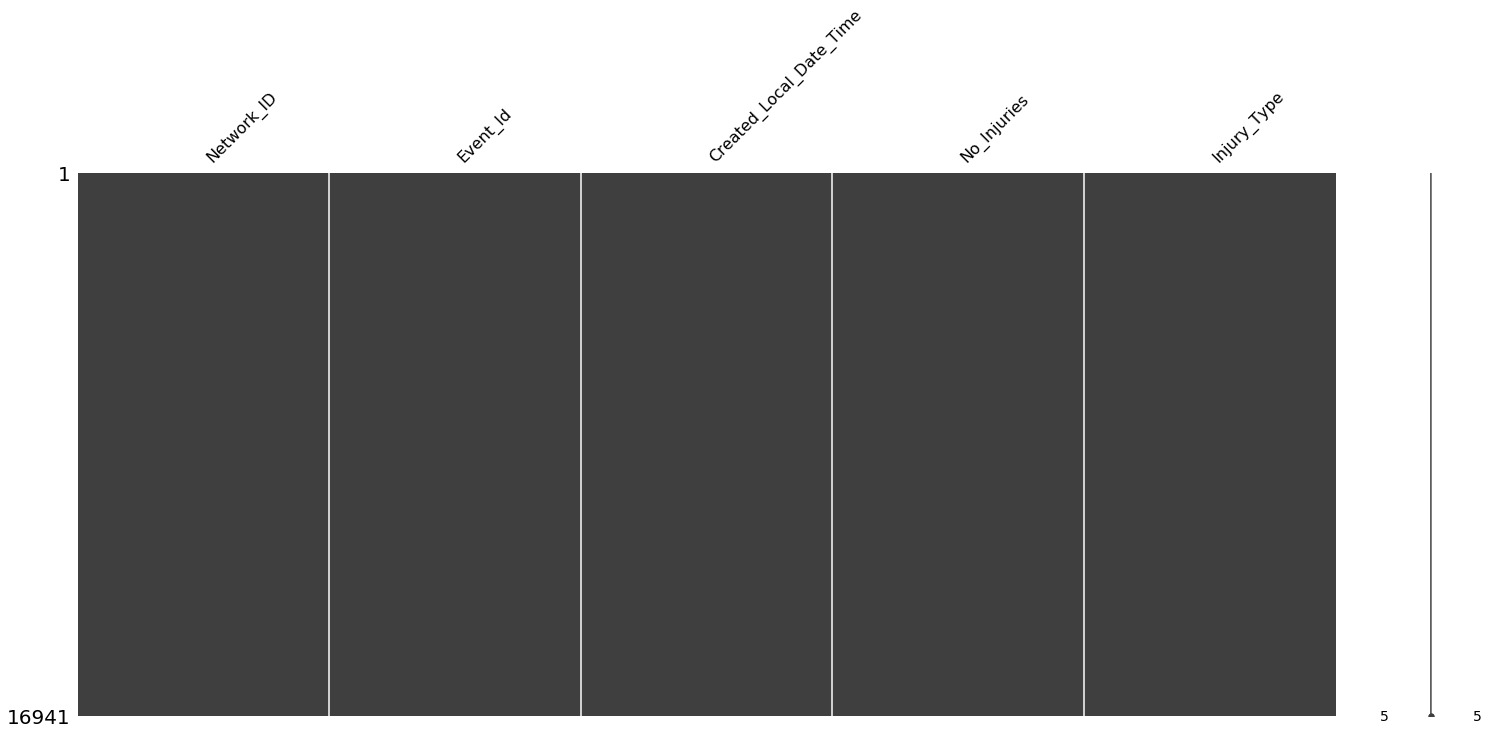

In [130]:
import missingno as msno
msno.matrix(injuries_new)

In [93]:
#injuries['Created Local Date Time'] = pd.to_datetime(injuries['Created Local Date Time'], format='%d%b%Y:%H:%M:%S')

In [126]:
train['Created_Local_Date_Time'] = pd.to_datetime(train['Created_Local_Date_Time'])
train.dtypes

Network ID                         object
Event Id                            int64
Created Local Date Time            object
No Injuries                         int64
Injury Type                        object
Created_Local_Date_Time    datetime64[ns]
dtype: object

In [134]:
train = injuries_new.loc[injuries_new['Created_Local_Date_Time'] < '2018-01-01']
train = train.loc[train['Created_Local_Date_Time'] >= '2017-01-01']

# Test locally on the last part of 2018
local_test = injuries_new.loc[injuries_new['Created_Local_Date_Time'] < '2019-01-01']
local_test = local_test.loc[local_test['Created_Local_Date_Time'] >= '2018-09-01']

In [139]:
sids = injuries_new['No_Injuries'].unique()

dts = pd.date_range('2017-01-01',
                    '2018-01-01',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    tr[str(sid)] = 0
    events = train.loc[train['No_Injuries'] == sid]
    dts = events['Created_Local_Date_Time'].dt.round('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1
tr.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [97]:
LocalDate = pd.date_range(start="2017-01-01", end="2020-01-01")


In [98]:
categorical_columns = injuries.select_dtypes([object, "category"]).columns
categorical_data = injuries[categorical_columns]
categorical_data.head()

,Network ID,Created Local Date Time,Injury Type
0,WC,01/01/16 02:23,Light
1,WC,01/01/16 07:05,Severe
2,WC,01/01/16 08:43,Light
3,WC,03/01/16 03:47,Light
4,WC,03/01/16 08:40,Light


In [99]:
categorical_data_codified = pd.get_dummies(categorical_data, 
                                          drop_first=True,
                                          dtype="int64")
categorical_data_codified.head()

,Created Local Date Time_01/01/16 07:05,Created Local Date Time_01/01/16 08:43,Created Local Date Time_01/01/17 01:58,Created Local Date Time_01/01/17 04:55,Created Local Date Time_01/02/16 07:35,Created Local Date Time_01/02/16 20:24,Created Local Date Time_01/02/17 11:15,Created Local Date Time_01/03/16 19:08,Created Local Date Time_01/03/16 21:11,Created Local Date Time_01/04/17 05:46,...,Created Local Date Time_Sep 30 2018 11:30PM,Created Local Date Time_Sep 30 2018 11:35PM,Created Local Date Time_Sep 30 2018 11:47PM,Created Local Date Time_Sep 30 2018 12:09PM,Created Local Date Time_Sep 30 2018 12:15AM,Created Local Date Time_Sep 30 2018 12:20AM,Created Local Date Time_Sep 30 2018 12:50PM,Injury Type_Light,Injury Type_None,Injury Type_Severe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:

vehicles.head()

,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color,Unnamed: 5
0,WC,60558.0,01/01/16 00:52,Car,White,NaN
1,WC,60559.0,01/01/16 00:49,Car,Other,NaN
2,WC,60560.0,01/01/16 02:23,Car,Other,NaN
3,WC,60560.0,01/01/16 02:23,Car,Other,NaN
4,WC,60561.0,01/01/16 02:55,Car,White,NaN


In [150]:
vehicles  = vehicles.drop("Unnamed: 5", 1)

In [151]:
vehicles

,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558.0,01/01/16 00:52,Car,White
1,WC,60559.0,01/01/16 00:49,Car,Other
2,WC,60560.0,01/01/16 02:23,Car,Other
3,WC,60560.0,01/01/16 02:23,Car,Other
4,WC,60561.0,01/01/16 02:55,Car,White
...,...,...,...,...,...
63463,WC,152136.0,Dec 31 2018 9:12PM,Car,Other
63464,WC,152139.0,Dec 31 2018 9:32PM,Car,Other
63465,WC,152142.0,Dec 31 2018 9:54PM,Car,Other
63466,WC,152143.0,Dec 31 2018 10:11PM,Car,Silver


In [153]:
new = pd.concat([injuries, vehicles.reindex(injuries.index)], axis=1)


In [162]:
new

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60560,01/01/16 02:23,2,Light,WC,60558,01/01/16 00:52,Car,White
1,WC,60565,01/01/16 07:05,4,Severe,WC,60559,01/01/16 00:49,Car,Other
2,WC,60569,01/01/16 08:43,1,Light,WC,60560,01/01/16 02:23,Car,Other
3,WC,60626,03/01/16 03:47,5,Light,WC,60560,01/01/16 02:23,Car,Other
4,WC,60631,03/01/16 08:40,2,Light,WC,60561,01/01/16 02:55,Car,White
...,...,...,...,...,...,...,...,...,...,...
16936,WC,152136,Dec 31 2018 9:12PM,0,None,WC,87015,20/11/16 14:35,Car,Other
16937,WC,152139,Dec 31 2018 9:32PM,0,None,WC,87016,20/11/16 15:49,Minibus,White
16938,WC,152142,Dec 31 2018 9:54PM,0,None,WC,87017,20/11/16 16:07,Truck,White
16939,WC,152143,Dec 31 2018 10:11PM,0,None,WC,87017,20/11/16 16:07,LDV,Blue


In [166]:
new['Created Local Date Time'] = pd.to_datetime(new['Created Local Date Time'])
new['CreatedLOcalDateTime'] = pd.to_datetime(new['CreatedLOcalDateTime'])


In [167]:
new.dtypes

Network ID                         object
Event Id                            int64
Created Local Date Time    datetime64[ns]
No Injuries                         int64
Injury Type                        object
NetworkId                          object
EventID                             int64
CreatedLOcalDateTime       datetime64[ns]
VehicleType                        object
Color                              object
dtype: object

In [160]:
new["EventID"] = new["EventID"].astype(int)

In [ ]:
def same_date():
    for EventID == 

In [145]:
vehicles["VehicleType"].unique()

array(['Car', 'Minibus', 'LDV', 'Taxi', 'Truck', 'Other', 'Motorcycle',
       'Bus', 'Toyota Carrolla', nan, 'lf', 'IVECO', 'Unable to ID',
       'Bicycle', 'GOLDEN ARROW', 'f'], dtype=object)

In [171]:
injuries['Event Id'] = vehicles['EventID']

In [172]:
injuries

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type
0,WC,60558.0,01/01/16 02:23,2,Light
1,WC,60559.0,01/01/16 07:05,4,Severe
2,WC,60560.0,01/01/16 08:43,1,Light
3,WC,60560.0,03/01/16 03:47,5,Light
4,WC,60561.0,03/01/16 08:40,2,Light
...,...,...,...,...,...
16936,WC,87015.0,Dec 31 2018 9:12PM,0,None
16937,WC,87016.0,Dec 31 2018 9:32PM,0,None
16938,WC,87017.0,Dec 31 2018 9:54PM,0,None
16939,WC,87017.0,Dec 31 2018 10:11PM,0,None


In [173]:
vehicles

,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558.0,01/01/16 00:52,Car,White
1,WC,60559.0,01/01/16 00:49,Car,Other
2,WC,60560.0,01/01/16 02:23,Car,Other
3,WC,60560.0,01/01/16 02:23,Car,Other
4,WC,60561.0,01/01/16 02:55,Car,White
...,...,...,...,...,...
63463,WC,152136.0,Dec 31 2018 9:12PM,Car,Other
63464,WC,152139.0,Dec 31 2018 9:32PM,Car,Other
63465,WC,152142.0,Dec 31 2018 9:54PM,Car,Other
63466,WC,152143.0,Dec 31 2018 10:11PM,Car,Silver


In [170]:
new

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60560,2016-01-01 02:23:00,2,Light,WC,60560,2016-01-01 00:52:00,Car,White
1,WC,60565,2016-01-01 07:05:00,4,Severe,WC,60565,2016-01-01 00:49:00,Car,Other
2,WC,60569,2016-01-01 08:43:00,1,Light,WC,60569,2016-01-01 02:23:00,Car,Other
3,WC,60626,2016-03-01 03:47:00,5,Light,WC,60626,2016-01-01 02:23:00,Car,Other
4,WC,60631,2016-03-01 08:40:00,2,Light,WC,60631,2016-01-01 02:55:00,Car,White
...,...,...,...,...,...,...,...,...,...,...
16936,WC,152136,2018-12-31 21:12:00,0,None,WC,152136,2016-11-20 14:35:00,Car,Other
16937,WC,152139,2018-12-31 21:32:00,0,None,WC,152139,2016-11-20 15:49:00,Minibus,White
16938,WC,152142,2018-12-31 21:54:00,0,None,WC,152142,2016-11-20 16:07:00,Truck,White
16939,WC,152143,2018-12-31 22:11:00,0,None,WC,152143,2016-11-20 16:07:00,LDV,Blue


In [176]:
train = pd.merge(injuries, vehicles, left_on='Event Id', right_on='EventID')
train

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558.0,01/01/16 02:23,2,Light,WC,60558.0,01/01/16 00:52,Car,White
1,WC,60559.0,01/01/16 07:05,4,Severe,WC,60559.0,01/01/16 00:49,Car,Other
2,WC,60560.0,01/01/16 08:43,1,Light,WC,60560.0,01/01/16 02:23,Car,Other
3,WC,60560.0,01/01/16 08:43,1,Light,WC,60560.0,01/01/16 02:23,Car,Other
4,WC,60560.0,03/01/16 03:47,5,Light,WC,60560.0,01/01/16 02:23,Car,Other
...,...,...,...,...,...,...,...,...,...,...
23018,WC,87017.0,Dec 31 2018 9:54PM,0,None,WC,87017.0,20/11/16 16:07,Truck,White
23019,WC,87017.0,Dec 31 2018 9:54PM,0,None,WC,87017.0,20/11/16 16:07,LDV,Blue
23020,WC,87017.0,Dec 31 2018 10:11PM,0,None,WC,87017.0,20/11/16 16:07,Truck,White
23021,WC,87017.0,Dec 31 2018 10:11PM,0,None,WC,87017.0,20/11/16 16:07,LDV,Blue


In [182]:
train['Event Id'] = train['Event Id'].astype(int)

In [183]:
train.dtypes

Network ID                  object
Event Id                     int64
Created Local Date Time     object
No Injuries                  int64
Injury Type                 object
NetworkId                   object
EventID                    float64
CreatedLOcalDateTime        object
VehicleType                 object
Color                       object
dtype: object

In [188]:
train

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type,NetworkId,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558,01/01/16 02:23,2,Light,WC,01/01/16 00:52,Car,White
1,WC,60559,01/01/16 07:05,4,Severe,WC,01/01/16 00:49,Car,Other
2,WC,60560,01/01/16 08:43,1,Light,WC,01/01/16 02:23,Car,Other
3,WC,60560,01/01/16 08:43,1,Light,WC,01/01/16 02:23,Car,Other
4,WC,60560,03/01/16 03:47,5,Light,WC,01/01/16 02:23,Car,Other
...,...,...,...,...,...,...,...,...,...
23018,WC,87017,Dec 31 2018 9:54PM,0,None,WC,20/11/16 16:07,Truck,White
23019,WC,87017,Dec 31 2018 9:54PM,0,None,WC,20/11/16 16:07,LDV,Blue
23020,WC,87017,Dec 31 2018 10:11PM,0,None,WC,20/11/16 16:07,Truck,White
23021,WC,87017,Dec 31 2018 10:11PM,0,None,WC,20/11/16 16:07,LDV,Blue


In [191]:
train.to_csv('vehicles_injuries.csv', index =False)

In [192]:
train.dtypes

Network ID                 object
Event Id                    int64
Created Local Date Time    object
No Injuries                 int64
Injury Type                object
NetworkId                  object
CreatedLOcalDateTime       object
VehicleType                object
Color                      object
dtype: object